# Decision Trees & Perceptron(with Titanic dataset)

## Intro

In this notebook, we're going to test some models on titanic dataset.
![title](../images/titanic.jpg)
First, we start by preprocessing our data. Then, we go on with trying 3 methods(= 3 models) on this dataset: first one is training a Decision Tree, and the second is using a Perceptron model. Finally, we combine these methods and examine the quality of this combined model.

The library we use in this notebook is Scikit-Learn.

## Import Libraries

In [64]:
import pandas as pd
import numpy as np
import sklearn

## Load data

In [65]:
X_train = pd.read_csv('../dataset/train.csv')
y_train = pd.read_csv('../dataset/train_labels.csv')
X_test = pd.read_csv('../dataset/test.csv')
y_test = pd.read_csv('../dataset/test_labels.csv')

In [66]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare
count,800.000000,800.000000,640.000000,800.000000,800.000000,5.890000e+02,800.000000
mean,447.867500,2.311250,29.632031,0.541250,0.387500,2.649668e+05,32.592395
std,258.858126,0.835312,14.617948,1.139044,0.811275,4.819212e+05,50.726982
min,1.000000,1.000000,0.670000,0.000000,0.000000,6.950000e+02,0.000000
25%,224.750000,2.000000,20.000000,0.000000,0.000000,2.416000e+04,7.925000
50%,449.500000,3.000000,28.000000,0.000000,0.000000,2.361710e+05,14.500000
75%,677.250000,3.000000,38.000000,1.000000,0.000000,3.477430e+05,31.275000
max,891.000000,3.000000,80.000000,8.000000,6.000000,3.101298e+06,512.329200


In [67]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,484,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134.0,9.5875,NaN,S
1,276,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502.0,77.9583,D7,S
2,223,3,"Green, Mr. George Henry",male,51.0,0,0,21440.0,8.0500,NaN,S
3,632,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743.0,7.0542,NaN,S
4,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077.0,31.3875,NaN,S


In [68]:
y_train.head()

,Survived
0,1
1,1
2,0
3,0
4,1


## Preprocessing

### Detecting missing values

We first have to understand our data. So one of the first things to do is handling the missing values. with the help of missingno library, we visualize our features and see which features have missing values and how many.

In [69]:
import missingno as msno

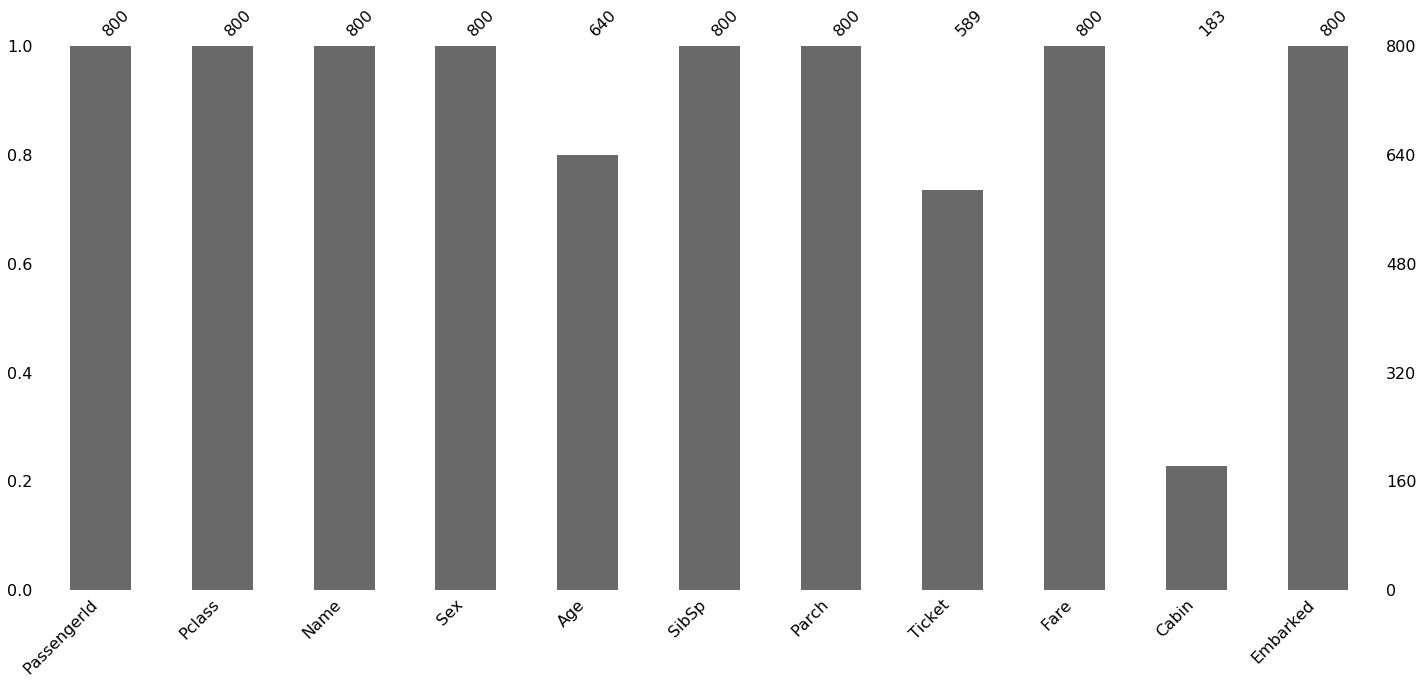

In [70]:
msno.bar(X_train)

We can see that Age, Ticket and Cabin columns have missing values.

So we need to handle the missing values. We can drop all the data have missing values, but another option is Impute the data. We're going to use the second approach.

### Imputation

For Imputaion, we first need to provide our tools and libraries. SimpleImputer class is enough to us.

In [71]:
from sklearn.impute import SimpleImputer

We create an instace from it with configuration of some settings: for pointing to missing values, we use np.nan and our strategy against them is replacing missing values of a feature(a column) with the most frequent value for that feature.

To avoid loosing the original data, We first create a copy from it and then fit and transform our imputer on this copy.

In [72]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train_copy = X_train.copy()
imputer = imputer.fit(X_train_copy)
X_train_copy = imputer.transform(X_train_copy)

Now, we can build a dataframe from train data and see what happened.

In [73]:
df = pd.DataFrame(data=X_train_copy, columns=["PassengerId","Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,484,3,"Turkula, Mrs. (Hedwig)",female,63,0,0,4134,9.5875,B96 B98,S
1,276,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S
2,223,3,"Green, Mr. George Henry",male,51,0,0,21440,8.05,B96 B98,S
3,632,3,"Lundahl, Mr. Johan Svensson",male,51,0,0,347743,7.0542,B96 B98,S
4,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38,1,5,347077,31.3875,B96 B98,S


We repeat this scenario for test data.

In [74]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_test_copy = X_test.copy()
imputer = imputer.fit(X_test_copy)
X_test_copy = imputer.transform(X_test_copy)

In [75]:
df = pd.DataFrame(data=X_test_copy, columns=["PassengerId","Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,373,3,"Beavan, Mr. William Thomas",male,19,0,0,323951,8.05,A19,S
1,22,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13,D56,S
2,714,3,"Larsson, Mr. August Viktor",male,29,0,0,7545,9.4833,A19,S
3,648,1,"Simonius-Blumer, Col. Oberst Alfons",male,56,0,0,13213,35.5,A26,C
4,59,2,"West, Miss. Constance Mirium",female,5,1,2,7534,27.75,A19,S


### Encoding

So far, we handled missing values in our dataset. but as you saw, some columns have non-numeric values that models can not work with them. So we need to convert them to numeric values by a way: Label Encoding.

#### Label Encoding

Initaliy, we import our requirements.

In [76]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

With built instance of Label Encoder, we can now fit that on a specified column and then transform it. as you saw before, 'Name', 'Sex' and 'Cabin' and 'Embarked' columns have non-numeric values. So we encode their values by our encoder instance.

In [77]:
# Name
enc = enc.fit(X_train_copy[:,2])
X_train_copy[:, 2] = enc.transform(X_train_copy[:, 2])

# Sex
enc = enc.fit(X_train_copy[:,3])
X_train_copy[:, 3] = enc.transform(X_train_copy[:, 3])

# Cabin
enc = enc.fit(X_train_copy[:,9])
X_train_copy[:, 9] = enc.transform(X_train_copy[:, 9])

# Embarked
enc = enc.fit(X_train_copy[:,10])
X_train_copy[:, 10] = enc.transform(X_train_copy[:, 10])

# print(X_train_copy[:5, :])

In [82]:
# Name
enc = enc.fit(X_test_copy[:,2])
X_test_copy[:, 2] = enc.transform(X_test_copy[:, 2])

# Sex
enc = enc.fit(X_test_copy[:,3])
X_test_copy[:, 3] = enc.transform(X_test_copy[:, 3])

# Cabin
enc = enc.fit(X_test_copy[:,9])
X_test_copy[:, 9] = enc.transform(X_test_copy[:, 9])

# Embarked
enc = enc.fit(X_test_copy[:,10])
X_test_copy[:, 10] = enc.transform(X_test_copy[:, 10])

# print(X_test_copy[:5, :])

Now, if we have a look to head of data, we cen see the changes.

In [78]:
df = pd.DataFrame(data=X_train_copy, columns=["PassengerId","Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,484,3,741,0,63,0,0,4134,9.5875,40,2
1,276,1,28,0,63,1,0,13502,77.9583,102,2
2,223,3,276,1,51,0,0,21440,8.05,40,2
3,632,3,446,1,51,0,0,347743,7.0542,40,2
4,26,3,39,0,38,1,5,347077,31.3875,40,2


as you can see above, the mentioned columns have our desired changes.

### Scaling 

Now we have a numeric data. but there is another problem. Let's explain it with one example. Consider two 'Age' and 'Fare' columns. the values of the first, as we expect, is logically about 0 up to 100. but what about 'Fare'? Logically, the values of this feature may be more than the scale of 'Age' feature. this difference in scales may cause some problmes; for example, in MLPs, Lack of scaling may cause gradient vanishing/exploding. The scaling doesn't affect on decistion tree learning process. Therefore, at leaest we need to scaling for Perceptron.  

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_copy)

C:\Users\Miras\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
X_train_std = scaler.transform(X_train_copy)

C:\Users\Miras\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [85]:
X_test_std = scaler.transform(X_test_copy)

C:\Users\Miras\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 1. Decision Tree

Now, it's time to try the models! we start with Decision Trees. after import the class, we set the parameter max_depth=3 to prevent overfitting of the model.

### model

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier(max_depth=3)

### Train

Then, we fit the model on the train data.

In [87]:
dtree_clf = dtree_clf.fit(X_train_copy, y_train)

### Test

and finally test it on the test data.

In [22]:
y_pred = dtree_clf.predict(X_test_copy)

In [88]:
from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % dt_score)

Accuracy: 0.846


The accuracy is about 73%. Good but not enough!

## 2. Perceptron

We try this time Precpetron model.

### model

In [89]:
from sklearn.linear_model import Perceptron
perceptron_clf = Perceptron()

### Train

In [90]:
# y = column_or_1d(y_train, warn=True)
perceptron_clf.fit(X_train_std, np.ravel(y_train))

C:\Users\Miras\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

### Test

In [91]:
y_pred = perceptron_clf.predict(X_test_std)

In [92]:
perceptron_score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % perceptron_score)

Accuracy: 0.813


as you see,, the accuracy of the model improved about 8%. Let's try a better approach: Combine two these models!

## 3. Decision Tree + Perceptron

We first break our train data into partiotins and use the bigger section to select more important features. 

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_percceptron, X_dtree, y_perceptron, y_dtree = train_test_split(X_train_std, y_train, test_size=0.7, random_state=42)

### model

In [95]:
perceptron_clf = Perceptron()
dtree_clf = DecisionTreeClassifier()

### Train

In [96]:
perceptron_clf.fit(X_percceptron, np.ravel(y_perceptron))

C:\Users\Miras\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

Now we use coef_ attribute of Perceptron model to see the importance value of the features.

In [97]:
perceptron_clf.coef_

array([[-0.51900629, -4.04593035,  1.29037886, -5.66133495, -1.99671512,
        -4.31991939, -0.27751486,  1.41120921,  0.55308891, -3.25620717,
         0.08863068]])

Then, we get absoloute values of them and select 5 top ones(5 most important features).

In [98]:
weights = perceptron_clf.coef_[0]
# print(weights)
abs_weights = np.abs(weights)
# print(abs_weights)
n=5
indices = (-abs_weights).argsort()[:n]
# print(indices)

Next, we use the train data with theses 5 top features and train the tree with that.

In [99]:
X_train_feature_selected = X_train_std[: , [index for index in indices]]

In [100]:
X_test_feature_selected = X_test_std[: , [index for index in indices]]

In [101]:
dtree_clf = dtree_clf.fit(X_train_feature_selected, y_train)

### Test

In [102]:
y_pred = dtree_clf.predict(X_test_feature_selected)

In [103]:
combined_score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % combined_score)

Accuracy: 0.846


Nice! the improvment is statisfied a little bit.

## Further Readings

1. https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python
2. https://www.kaggle.com/dansbecker/handling-missing-values
3. https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding
4. https://stats.stackexchange.com/questions/143700/which-is-better-replacement-by-mean-and-replacement-by-median
5. https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
6. https://www.kaggle.com/rnikolaus/titanic-decision-tree-visualisation
7. https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
8. https://www.kite.com/python/answers/how-to-find-the-n-maximum-indices-of-a-numpy-array-in-python
9. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
10. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
11. https://scikit-learn.org/stable/glossary.html#term-random_state